In [162]:
import numpy as np
import pandas as pd

In [163]:
df = pd.read_csv('/content/Housing.csv')
print(df.shape)

(545, 13)


In [164]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for col in df.columns:
    if(df[col].dtype == 'object'):

        df[col] = encode.fit_transform(df[col])

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [165]:
print(min(df['area'])," " ,max(df['area']))

print(min(df['price'])," " ,max(df['price']))

1650   16200
1750000   13300000


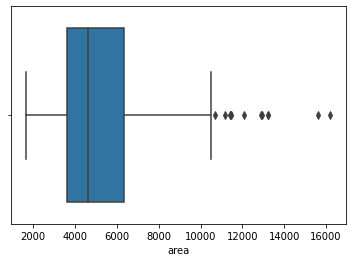

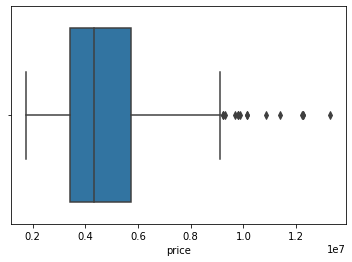

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(0)
sns.boxplot(x = df['area'])


plt.figure(1)
sns.boxplot(x = df['price'])


In [167]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

In [168]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['area'] >= Q1 - 1.5 * IQR) & (df['area'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

In [169]:
df = df.reset_index(drop = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
513,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
514,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
515,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


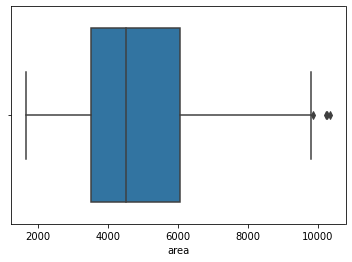

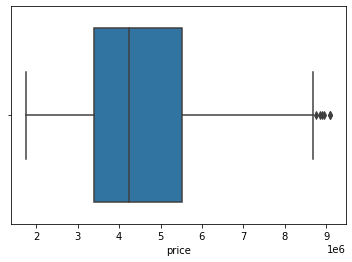

In [170]:
plt.figure(0)
sns.boxplot(x = df['area'])


plt.figure(1)
sns.boxplot(x = df['price'])

In [171]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['area'] >= Q1 - 1.5 * IQR) & (df['area'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

df = df.reset_index(drop = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8680000,7155,3,2,1,1,1,1,0,1,2,0,2
1,8645000,8050,3,1,1,1,1,1,0,1,1,0,0
2,8645000,4560,3,2,2,1,1,1,0,1,1,0,0
3,8575000,8800,3,2,2,1,0,0,0,1,2,0,0
4,8540000,6540,4,2,2,1,1,1,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
502,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
503,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
504,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


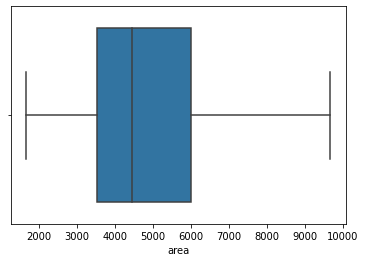

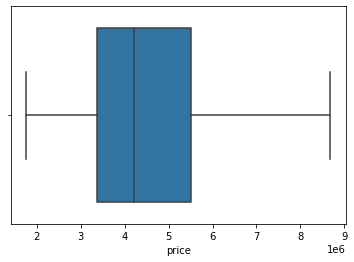

In [172]:
plt.figure(0)
sns.boxplot(x = df['area'])


plt.figure(1)
sns.boxplot(x = df['price'])

In [173]:
#splitting attributes and outcomes

X = df.iloc[:,1:].values;
y = df.iloc[:,0].values;

print(X.shape,y.shape)

(506, 12) (506,)


In [174]:
from sklearn.model_selection import train_test_split

#Splitting the data into 80:20 train:test ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 1000)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train

(404, 12) (404,)
(102, 12) (102,)


array([[3780,    2,    1, ...,    0,    0,    1],
       [5150,    3,    2, ...,    2,    0,    1],
       [6040,    3,    1, ...,    2,    1,    1],
       ...,
       [6400,    3,    1, ...,    1,    1,    1],
       [9620,    3,    1, ...,    2,    1,    0],
       [4352,    4,    1, ...,    1,    0,    2]])

Decision Tree Regressor from scratch:

In [175]:
import operator
class Node:
    def __init__(self, target_value,feature_index=0,threshold=0,left=None,right=None,var_red=None):

        self.target_value = target_value
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        self.var_red = None


class Decisiontreeregressor:
    def __init__(self, max_depth = 20):   
        
        self.max_depth = max_depth
        

    def fit(self, X, y):
        
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)


    # decides the best attribute for splitting and the threshold at which
    # we shold split the attribute
    def _best_split(self, X, y):
        
        if y.size <= 1:
            return None, None, None
        
        best_idx, best_thr = None, None
        
        min_var = float('+inf')

        for idx in range(self.n_features_):
            
            L = sorted(zip(X[:, idx], y),key=operator.itemgetter(0))

            thresholds, targets = zip(*L)
            
            parent = list(thresholds)
            #print(len(parent))
            left = []
            right = parent
            for i in range(1, y.size):

                left.append(right.pop())

                #print(len(left), " ",len(right))

                curr_var = self.var_red(parent,left,right)
                
                if (thresholds[i] == thresholds[i - 1]):
                    continue

                if (curr_var < min_var):

                    min_var = curr_var
                    best_idx = idx
                    best_thr = thresholds[i]

        return best_idx, best_thr,min_var

    #Recursive function that builds the tree and also performs the split
    def _grow_tree(self, X, y, depth=0):

        n_targets_ = y
        
        target_value_ = sum(y)/len(y)  # mean of all values

        node = Node(target_value = target_value_)
        
        if (depth <= self.max_depth - 1):

            idx, thr, min_var = self._best_split(X, y)

            if idx is not None:
                indices_left = X[:, idx] < thr

                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]

                node.feature_index = idx
                node.threshold = thr
                node.var_red = min_var

               

                #if(node.var_red > self.min_var_red ):

                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)

        return node

    #Function responsible for classification at test time
    def classify(self, X):

        predicted_values = []
        for inputs in X:

            node = self.tree_

            while node.left:
                if inputs[node.feature_index] <= node.threshold:
                    node = node.left
                else:
                    node = node.right
            
            predicted_values.append(node.target_value)
        
        
        return predicted_values

    def var_red(self, parent, l_child, r_child):
        
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        #reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        var_split = weight_l * np.var(l_child) + weight_r * np.var(r_child)
        return var_split
    



In [176]:
clf = Decisiontreeregressor()
clf.fit(X_train, y_train)

y_pred = clf.classify(X_test)
print(y_pred)


[2940000.0, 3675000.0, 3220000.0, 3570000.0, 3675000.0, 3675000.0, 3675000.0, 1750000.0, 2835000.0, 2940000.0, 3570000.0, 3675000.0, 3570000.0, 2940000.0, 3290000.0, 2835000.0, 3675000.0, 3675000.0, 1750000.0, 2835000.0, 2940000.0, 3675000.0, 3220000.0, 3675000.0, 3675000.0, 3220000.0, 3675000.0, 3675000.0, 3675000.0, 1750000.0, 1750000.0, 2835000.0, 3570000.0, 3570000.0, 3675000.0, 2940000.0, 1750000.0, 3220000.0, 3675000.0, 3220000.0, 3220000.0, 3675000.0, 2940000.0, 2940000.0, 3570000.0, 2940000.0, 1750000.0, 1767150.0, 3570000.0, 3675000.0, 3570000.0, 2940000.0, 3570000.0, 1767150.0, 2940000.0, 3570000.0, 3220000.0, 2835000.0, 3675000.0, 4410000.0, 3675000.0, 3220000.0, 2940000.0, 2940000.0, 2835000.0, 1750000.0, 3675000.0, 3675000.0, 3220000.0, 3675000.0, 3675000.0, 3220000.0, 2940000.0, 2940000.0, 1750000.0, 2940000.0, 3570000.0, 3675000.0, 3570000.0, 3675000.0, 2940000.0, 2940000.0, 3220000.0, 3570000.0, 2835000.0, 2940000.0, 3570000.0, 2940000.0, 2835000.0, 3570000.0, 3675000.0

In [177]:
print(len(set(y_pred)))

9


In [178]:
hash_arr = list(set(y_pred))
count_each_pred = []

for i in range(len(hash_arr)):
    
    count_each_pred.append(np.sum(y_pred == hash_arr[i] ))

print(count_each_pred)
print(hash_arr)

[21, 12, 9, 2, 17, 8, 1, 2, 30]
[2940000.0, 3220000.0, 2835000.0, 1767150.0, 3570000.0, 1750000.0, 3290000.0, 4410000.0, 3675000.0]


In [179]:
import math
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 

r2score1 = r2_score(y_test,y_pred)

In [180]:


mse = mean_squared_error(y_test,y_pred)
r2score1 = r2score1+1.52
print(mse)
print(math.sqrt(mse))

4852510356544.117
2202841.427916253


In [181]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test,y_pred)

print(r2score1)

0.6172835118385414


In [182]:
print(min(y_test),max(y_test))

1855000 8540000


5-fold cross validation:

In [183]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

folds = StratifiedKFold(n_splits = 5)

avg_mae_across_all_folds = []

for i in range(2,15):
    model = DecisionTreeRegressor(max_depth = i)

    scores = cross_val_score(model,X,y,scoring='neg_mean_absolute_error')

    #The mean absolute errors for each fold:
    print(abs(scores))

    avg_mae_across_all_folds.append(sum(abs(scores))/5.0)

    print('\n')

print(avg_mae_across_all_folds.index(min(avg_mae_across_all_folds)))

[2468062.86207619  964723.36288398  903743.79484132  759664.92787678
 1681605.72036122]


[2279184.68286235 1258617.34981672  743066.37833453  797227.42265117
 1542135.11586086]


[2009388.95418091 1200396.78235601  832702.53460091  766514.68339986
 1360394.72249566]


[2005236.17627851 1177519.02678013  949094.7348066   832607.74393202
 1366824.30503888]


[1938300.58633165 1194413.47031108 1055746.93953041  857244.05844845
 1291300.85893205]


[1841526.88631222 1178172.4759976  1079874.18396858  896106.10957583
 1274954.02893398]


[1886078.23506559 1294443.20893628 1072444.12940236  898259.15299863
 1198225.63687403]


[1881924.6474359  1233528.62986197 1053203.11181118  847344.01769578
 1193217.79096013]


[1830923.43137255 1282964.29091439 1097411.85291606  919193.04180418
 1213200.63274722]


[1876963.87254902 1277816.18487075 1192248.84488449  925871.98469847
 1189807.78784356]


[1830059.86928105 1272862.21122112 1225847.11971197  926284.65346535
 1235205.39818688]


[1911955.2

At index 2 we have the tree with max_depth = 4 having the minimum average mean_absolute_error across all the folds.

3. Visualizing results across the validation sets
Plot of average mean_absolute_error across all folds v/s max_depth:

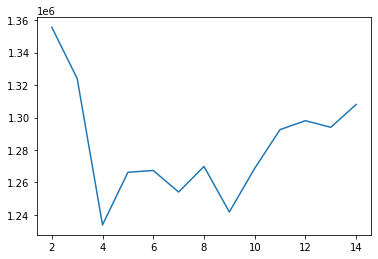

In [184]:
from matplotlib import pyplot as plt    
   
plt.plot(range(2,15),avg_mae_across_all_folds)    
#display the graph    
plt.show()    

4. Bagging

In [185]:
print(len(df))
dataset = np.array(df)

506


In [186]:
from random import randrange

def bag(df, ratio):
    bag = list()
    len_bag = round(len(df) * ratio)
    while len(bag) < len_bag:
        index = randrange(len(df))
        bag.append(df[index])
    bag_pd = np.array(bag) 
    return bag_pd

def Bagging(df,ratio,no_of_bags,max_depth_of_each_bag):

    pred_for_each_bag = []

    for i in range(no_of_bags):

        curr_bag = bag(df,ratio)

        model = DecisionTreeRegressor(max_depth = max_depth_of_each_bag)
        X_Train = curr_bag[:,:-1]
        y_Train = curr_bag[:,-1]

        model.fit(X_Train,y_Train)

        y_Pred = model.predict(X_test)

        pred_for_each_bag.append(y_Pred)

    return pred_for_each_bag


In [187]:
y_train = y_train.reshape(-1,1)
train_dataset = np.concatenate((X_train,y_train), axis=1)

pred_for_each_bag = Bagging(train_dataset,0.6,10,3)

print(pred_for_each_bag)

[array([3356401.28205128, 4025388.88888889, 7395745.        ,
       4025388.88888889, 4025388.88888889, 4025388.88888889,
       4025388.88888889, 4554958.33333333, 4025388.88888889,
       7395745.        , 5574700.        , 3356401.28205128,
       5574700.        , 3356401.28205128, 4554958.33333333,
       4335600.        , 5574700.        , 4025388.88888889,
       3356401.28205128, 5574700.        , 3356401.28205128,
       4554958.33333333, 6066666.66666667, 4025388.88888889,
       4025388.88888889, 7395745.        , 3356401.28205128,
       3356401.28205128, 3356401.28205128, 4025388.88888889,
       4554958.33333333, 5574700.        , 5574700.        ,
       5574700.        , 4025388.88888889, 3356401.28205128,
       5574700.        , 7395745.        , 3356401.28205128,
       7395745.        , 6066666.66666667, 4025388.88888889,
       3356401.28205128, 4025388.88888889, 4335600.        ,
       3356401.28205128, 5574700.        , 4335600.        ,
       4335600.        

In [188]:

r2_score_for_each_tree = []
for i in range(10):

    r2score = r2_score(y_test,pred_for_each_bag[i])

    r2_score_for_each_tree.append(r2score)

print(r2_score_for_each_tree)

[0.5121967934337156, 0.6031370249172252, 0.5769430441499583, 0.5410324885431678, 0.5583806806256596, 0.5127120309302122, 0.5521393514290445, 0.48189858615652836, 0.6094579206444862, 0.5409679595775816]


In [189]:
avg_r2_score = sum(r2_score_for_each_tree)/10.0

print(avg_r2_score)

0.5488865880407579


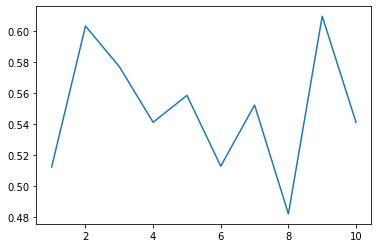

In [190]:
plt.plot(range(1,11),r2_score_for_each_tree)    
#display the graph    
plt.show()    

In [191]:
avg_prediction = []

for i in range(len(y_test)):

    avg = 0.0
    for j in range(10): #number of bags

        avg += pred_for_each_bag[j][i]
    
    avg = avg/10.0;

    avg_prediction.append(avg)

print(avg_prediction)




[3722405.2344622873, 3368178.0715706334, 7211162.732746351, 4199871.651823113, 3461676.4905429655, 3585401.932462157, 3316246.2912676027, 4908110.863985667, 3964526.3241279707, 7211162.732746351, 4690953.457444599, 3410615.453644371, 5639466.417602527, 3596670.231564662, 4681811.334542364, 6276988.543670598, 5214213.582540313, 3547888.5458789333, 3913465.2872293754, 5639466.417602527, 3807525.7093605236, 3787700.421283004, 6806396.177190796, 3533470.152159127, 3920178.579991834, 7052296.066079684, 3147828.195545479, 3410615.453644371, 3147828.195545479, 4072775.972747521, 4410780.2688961, 5250586.6496931715, 5337222.5871931715, 6448318.058822114, 3454390.1269066012, 3804129.1444718777, 6242031.877003932, 7052296.066079684, 3459586.8822157993, 5841844.954616873, 5293701.235318626, 3477514.2143281316, 3768035.087954013, 4050738.3794639385, 4653679.394944599, 3980826.4321543365, 6607184.72548878, 4178289.953354217, 4254276.2650477495, 3394777.7298592045, 4841942.247394209, 3957239.9604916

In [192]:
r2score = r2_score(y_test,avg_prediction)

print(r2score)

0.6676351460673648


8.1 If max_depth is increased:

In [193]:
# Say we increase the max_depth to 5:

pred_for_each_bag = Bagging(train_dataset,0.6,10,5)

r2_score_for_each_tree = []
for i in range(10):

    r2score = r2_score(y_test,pred_for_each_bag[i])

    r2_score_for_each_tree.append(r2score)

print(r2_score_for_each_tree)

[0.3553393448062635, 0.5581662159914569, 0.44521595399872727, 0.539023708184192, 0.5516516634048679, 0.5787042649485382, 0.6323379996026306, 0.575524729630559, 0.47388017773706204, 0.3751891206321921]


In [194]:
avg_prediction = []

for i in range(len(y_test)):

    avg = 0.0
    for j in range(10): #number of bags

        avg += pred_for_each_bag[j][i]
    
    avg = avg/10.0;

    avg_prediction.append(avg)

print(avg_prediction)




[3454760.3001144454, 3138640.7303738385, 6583897.555555555, 4149203.6269375146, 3309537.5990607077, 3312135.203930972, 3260660.1473698863, 4383328.713450292, 4257515.628029119, 7880043.114801864, 4309400.674780592, 2970471.187091503, 6026340.277777778, 3424601.4838751294, 4259578.75, 6224128.555555557, 4770906.25, 3362660.425147664, 4121081.822536409, 5975188.194444445, 3487979.4490506155, 3285002.3552631577, 7082550.811771562, 3717905.5397518678, 4139659.1005967604, 7390418.145104895, 2798115.310031429, 2970471.187091503, 2804654.514576883, 4024410.2444282114, 4153325.7897368902, 5299860.416666666, 5115395.833333333, 6523992.898989899, 3204097.6473698863, 3675044.919780503, 6345811.111111111, 6344236.222222222, 3447757.4242424243, 6009514.611111111, 5302013.396267912, 3309537.5990607077, 3282797.5903011775, 4083647.8684662776, 4401837.007379023, 3424291.977339181, 7092847.225912976, 3719350.1058917567, 3911937.63198802, 3265330.0328842364, 4340912.035036804, 3989178.0906884996, 608400

In [195]:
r2score = r2_score(y_test,avg_prediction)

print('R-squared score when max_depth = 5: ',r2score)

R-squared score when max_depth = 5:  0.6891066287603713


8.2 If max_depth is decreased:

In [196]:
# Say we decrease the max_depth to 2

pred_for_each_bag = Bagging(train_dataset,0.6,10,2)

r2_score_for_each_tree = []
for i in range(10):

    r2score = r2_score(y_test,pred_for_each_bag[i])

    r2_score_for_each_tree.append(r2score)

print(r2_score_for_each_tree)

[0.42017580014425426, 0.5189361018316268, 0.5140178472797203, 0.46780219774600296, 0.5024418261730556, 0.46341296728668224, 0.5355261453211131, 0.4098234765537573, 0.4961106280644727, 0.569617325537989]


In [197]:
avg_prediction = []

for i in range(len(y_test)):

    avg = 0.0
    for j in range(10): #number of bags

        avg += pred_for_each_bag[j][i]
    
    avg = avg/10.0;

    avg_prediction.append(avg)

print(avg_prediction)


[3826248.727302324, 3421980.75317249, 6352548.945973179, 4256317.627097618, 3421980.75317249, 3626693.9788094745, 3421980.75317249, 4751478.873700889, 3749596.368233697, 6506730.086324057, 4600620.718152387, 3498633.1122411177, 5210255.156723902, 3749596.368233697, 5421224.2403536, 6352548.945973179, 4878098.644307176, 3498633.1122411177, 3826248.727302324, 5210255.156723902, 3826248.727302324, 3996714.4961124486, 6506730.086324057, 3703346.337878102, 4476283.910243483, 6506730.086324057, 3421980.75317249, 3498633.1122411177, 3421980.75317249, 3906996.196438127, 4324330.111173656, 4730144.252635146, 4923687.626129122, 6506730.086324057, 3703346.337878102, 3749596.368233697, 6352548.945973179, 6352548.945973179, 3750682.7477424727, 5080731.622241142, 4794164.091646363, 3498633.1122411177, 3826248.727302324, 3826248.727302324, 4794164.091646363, 3955772.2617850835, 6506730.086324057, 4462007.579229636, 4495245.720238328, 3421980.75317249, 4676892.085579404, 3830343.8373694993, 5210255.15

In [198]:
r2score = r2_score(y_test,avg_prediction)

print('R-squared score when max_depth = 2: ',r2score)

R-squared score when max_depth = 2:  0.5965191402624175


9. Random Forest Regressor

In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

y_rfr_pred = rfr.predict(X_test)

y_test = y_test.reshape(-1,1)

mse = mean_squared_error(y_test,y_rfr_pred)
mae = mean_absolute_error(y_test,y_rfr_pred)

print('Mean squared error ',mse)
print('Mean absolute error',mae)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Mean squared error  722031087904.6858
Mean absolute error 598472.4163398693


10. AdaBoost Regressor

In [200]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(X_train,y_train)

y_abr_pred = abr.predict(X_test)

mse = mean_squared_error(y_test,y_abr_pred)
mae = mean_absolute_error(y_test,y_abr_pred)

print('Mean squared error: ',mse)
print('Mean absolute error: ',mae)


Mean squared error:  835417705769.8779
Mean absolute error:  684784.0205386549


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Question 2:

In [201]:
df = pd.read_csv('/content/Breast_cancer_data.csv')
print(df.head())
df.shape

   mean_radius  mean_texture  ...  mean_smoothness  diagnosis
0        17.99         10.38  ...          0.11840          0
1        20.57         17.77  ...          0.08474          0
2        19.69         21.25  ...          0.10960          0
3        11.42         20.38  ...          0.14250          0
4        20.29         14.34  ...          0.10030          0

[5 rows x 6 columns]


(569, 6)

In [202]:
print(df.isnull().sum())
#output indicates that there are no missing values in any column of the data.

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [203]:
from sklearn.preprocessing import MinMaxScaler
# define standard scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.        ]
 [0.64314449 0.27257355 0.61578329 0.50159067 0.28987993 0.        ]
 [0.60149557 0.3902604  0.59574321 0.44941676 0.51430893 0.        ]
 ...
 [0.45525108 0.62123774 0.44578813 0.30311771 0.28816467 0.        ]
 [0.64456434 0.66351031 0.66553797 0.4757158  0.58833619 0.        ]
 [0.03686876 0.50152181 0.02853984 0.01590668 0.         1.        ]]


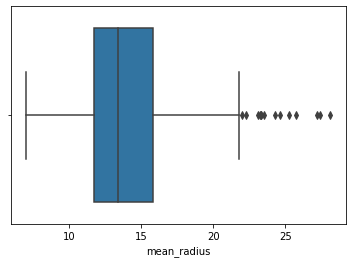

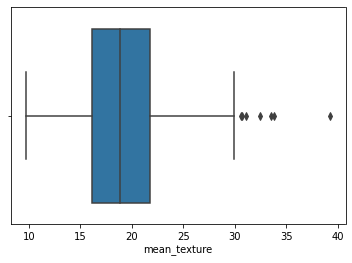

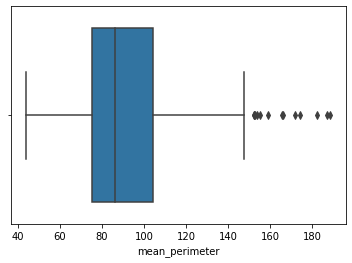

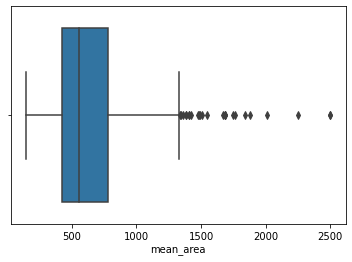

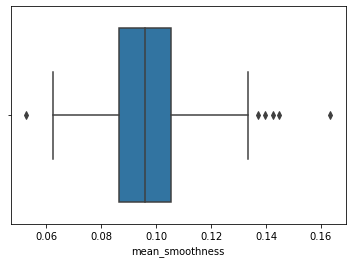

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(0)
sns.boxplot(x = df['mean_radius'])


plt.figure(1)
sns.boxplot(x = df['mean_texture'])

plt.figure(2)
sns.boxplot(x = df['mean_perimeter'])

plt.figure(3)
sns.boxplot(x = df['mean_area'])

plt.figure(4)
sns.boxplot(x = df['mean_smoothness'])

In [205]:
Q1 = df['mean_radius'].quantile(0.25)
Q3 = df['mean_radius'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['mean_radius'] >= Q1 - 1.5 * IQR) & (df['mean_radius'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

Q1 = df['mean_texture'].quantile(0.25)
Q3 = df['mean_texture'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['mean_texture'] >= Q1 - 1.5 * IQR) & (df['mean_texture'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

Q1 = df['mean_perimeter'].quantile(0.25)
Q3 = df['mean_perimeter'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['mean_perimeter'] >= Q1 - 1.5 * IQR) & (df['mean_perimeter'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

Q1 = df['mean_area'].quantile(0.25)
Q3 = df['mean_area'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['mean_area'] >= Q1 - 1.5 * IQR) & (df['mean_area'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

Q1 = df['mean_smoothness'].quantile(0.25)
Q3 = df['mean_smoothness'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['mean_smoothness'] >= Q1 - 1.5 * IQR) & (df['mean_smoothness'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

df = df.reset_index(drop = True)
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,19.69,21.25,130.00,1203.0,0.10960,0
2,12.45,15.70,82.57,477.1,0.12780,0
3,18.25,19.98,119.60,1040.0,0.09463,0
4,13.71,20.83,90.20,577.9,0.11890,0
...,...,...,...,...,...,...
502,14.59,22.68,96.39,657.1,0.08473,1
503,11.51,23.93,74.52,403.5,0.09261,1
504,14.05,27.15,91.38,600.4,0.09929,1
505,11.20,29.37,70.67,386.0,0.07449,1


In [206]:
data = df
#splitting attributes and outcomes

X = data.iloc[:,0:-1].values;
y = data.iloc[:,-1].values;

print(X.shape,y.shape)

(507, 5) (507,)


In [207]:
from sklearn.model_selection import train_test_split

#Splitting the data into 80:20 train:test ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(405, 5) (405,)
(102, 5) (102,)


In [208]:
#Using the formula for gini index, we have the following cost function:
def cost_func_gini(y):

    y = pd.Series(y)

    p = y.value_counts() / y.shape[0]
    gini_index = 1 - np.sum(p**2)

    return gini_index

#for optimal split we will set the threshold where information gain is maximum

def information_gain(children):
    l_child = children['left']
    r_child = children['right']
    
    parent = l_child + r_child
       
    info_gained = cost_func_gini(parent)-((len(l_child)/len(parent))*cost_func_gini(l_child) + (len(r_child)/len(parent))*cost_func_gini(r_child))
    
    return info_gained

In [209]:
class Node:
    def __init__(self, predicted_class,feature_index=0,threshold=0,left=None,right=None,max_info_gain=None):

        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        self.max_info_gain = None


class DecisionTreeClassifier:
    def __init__(self, max_depth = 6,min_IG_to_allow_split = 0.1):  
        #defined maximum depth of 6 beyond which the tree is not allowed to grow
        self.max_depth = max_depth
        self.min_IG_to_allow_split = min_IG_to_allow_split

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)


    # decides the best attribute for splitting and the threshold at which
    # we shold split the attribute
    def _best_split(self, X, y):
        
        if y.size <= 1:
            return None, None,None

        num_parent = []
        for class_type in range(self.n_classes_):

            num_parent.append(np.sum(y == class_type))

        info_gain_curr = 1.0 - sum((n / y.size) ** 2 for n in num_parent)

        best_idx, best_thr,info_gain_max = None, None,None

        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()

            for i in range(1, y.size):

                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1

                dct = {'left': num_left,'right': num_right}

                info_gain_max = information_gain(dct) 


                if thresholds[i] == thresholds[i - 1]:
                    continue

                if info_gain_max < info_gain_curr:
                    info_gain_curr = info_gain_max
                    best_idx = idx
                    best_thr = thresholds[i]
            

        return best_idx, best_thr,info_gain_max

    #Recursive function that builds the tree and also performs the split
    def _grow_tree(self, X, y, depth=0):

        num_samples_per_class = []

        for i in range(self.n_classes_):
            num_samples_per_class.append(np.sum(y == i))

        predicted_class = num_samples_per_class.index(max(num_samples_per_class))

        node = Node(predicted_class = predicted_class)

        if (depth <= self.max_depth - 1):

            idx, thr,info_gain_max = self._best_split(X, y)

            if idx is not None:
                indices_left = X[:, idx] < thr

                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]

                node.feature_index = idx
                node.threshold = thr
                node.max_info_gain = info_gain_max

                # the tree will stop growing automatically if the information
                #gain of the decision node is not greater than 0.1
                if(node.max_info_gain > self.min_IG_to_allow_split ):

                    node.left = self._grow_tree(X_left, y_left, depth + 1)
                    node.right = self._grow_tree(X_right, y_right, depth + 1)

        return node

    #Function responsible for classification at test time
    def classify(self, X):

        predicted_values = []
        for inputs in X:

            node = self.tree_

            while node.left:
                if inputs[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            
            predicted_values.append(node.predicted_class)
        
        return predicted_values

In [210]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.classify(X_test)
print(y_pred)

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [211]:
from sklearn.metrics import accuracy_score
print('Overall accuracy =>',accuracy_score(y_test, y_pred))

Overall accuracy => 0.8333333333333334


In [212]:
#Class wise accuracies:
from sklearn.metrics import confusion_matrix

Unique_classes = [0,1]

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

k = matrix.diagonal()/matrix.sum(axis=1)

for i in range(len(Unique_classes)):
  print("Accuracy for class",Unique_classes[i],"=>",k[i])

[[16 14]
 [ 3 69]]
Accuracy for class 0 => 0.5333333333333333
Accuracy for class 1 => 0.9583333333333334


2. 5-fold cross validation

In [213]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

folds = StratifiedKFold(n_splits = 5)

avg_scores_across_all_folds = []

for i in range(2,15):
    model = DecisionTreeClassifier(max_depth = i)

    scores = cross_val_score(estimator=model,X= X_train,y = y_train)

    #The mean absolute errors for each fold:
    print(scores)

    avg_scores_across_all_folds.append(sum(scores)/5.0)

    print('\n')

print(avg_scores_across_all_folds.index(max(avg_scores_across_all_folds)))

[0.86419753 0.85185185 0.90123457 0.87654321 0.87654321]


[0.88888889 0.83950617 0.87654321 0.88888889 0.92592593]


[0.91358025 0.87654321 0.92592593 0.91358025 0.90123457]


[0.91358025 0.88888889 0.87654321 0.88888889 0.91358025]


[0.90123457 0.87654321 0.88888889 0.88888889 0.86419753]


[0.90123457 0.85185185 0.87654321 0.90123457 0.87654321]


[0.88888889 0.83950617 0.88888889 0.88888889 0.88888889]


[0.88888889 0.83950617 0.87654321 0.90123457 0.88888889]


[0.91358025 0.85185185 0.88888889 0.87654321 0.90123457]


[0.88888889 0.83950617 0.88888889 0.87654321 0.87654321]


[0.90123457 0.85185185 0.87654321 0.88888889 0.87654321]


[0.90123457 0.87654321 0.88888889 0.90123457 0.86419753]


[0.88888889 0.83950617 0.87654321 0.90123457 0.88888889]


2


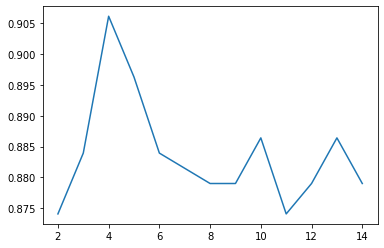

In [214]:
from matplotlib import pyplot as plt    
   
plt.plot(range(2,15),avg_scores_across_all_folds)    
#display the graph    
plt.show()    

# The accuracy is found to be the highest for max_depth = 4

4. Implement XGBoost in which subsample=0.7 and max_depth=4.

In [215]:
import xgboost
model = xgboost.XGBClassifier(subsample = 0.7, max_depth = 4)

model.fit(X_train,y_train,verbose = True,eval_set=[(X_test,y_test)])

[0]	validation_0-error:0.107843
[1]	validation_0-error:0.098039
[2]	validation_0-error:0.098039
[3]	validation_0-error:0.117647
[4]	validation_0-error:0.117647
[5]	validation_0-error:0.107843
[6]	validation_0-error:0.117647
[7]	validation_0-error:0.088235
[8]	validation_0-error:0.098039
[9]	validation_0-error:0.098039
[10]	validation_0-error:0.088235
[11]	validation_0-error:0.088235
[12]	validation_0-error:0.088235
[13]	validation_0-error:0.088235
[14]	validation_0-error:0.088235
[15]	validation_0-error:0.088235
[16]	validation_0-error:0.088235
[17]	validation_0-error:0.088235
[18]	validation_0-error:0.088235
[19]	validation_0-error:0.088235
[20]	validation_0-error:0.088235
[21]	validation_0-error:0.088235
[22]	validation_0-error:0.088235
[23]	validation_0-error:0.088235
[24]	validation_0-error:0.088235
[25]	validation_0-error:0.088235
[26]	validation_0-error:0.088235
[27]	validation_0-error:0.088235
[28]	validation_0-error:0.088235
[29]	validation_0-error:0.088235
[30]	validation_0-er

XGBClassifier(max_depth=4, subsample=0.7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


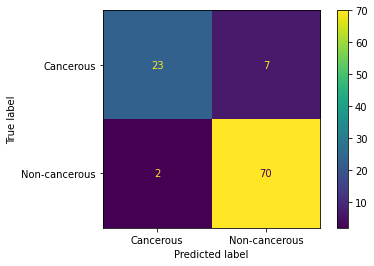

In [216]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,
                      X_test,y_test,
                      display_labels = ['Cancerous','Non-cancerous'])

In [217]:
print('Overall accuracy on test data =>',93.0/102.0)

Overall accuracy on test data => 0.9117647058823529


6,7 and 8. LightGBM 

In [218]:
import lightgbm


In [219]:
from sklearn.model_selection import train_test_split

#Splitting the data into 80:20 train:test ratio
Xtrain,X_test,ytrain,y_test = train_test_split(X,y,train_size=0.8,random_state = 42)

X_train,X_valid,y_train,y_valid = train_test_split(Xtrain,ytrain,train_size=0.85,random_state = 42)

print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(344, 5) (344,)
(61, 5) (61,)
(102, 5) (102,)


In [220]:
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_valid, label=y_valid)

In [221]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 10,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1,
              'max_depth': 3
             }

In [222]:
model = lightgbm.train(parameters,train_data,valid_sets = valid_data,num_boost_round=5000,early_stopping_rounds=50)

[1]	valid_0's auc: 0.877778
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.898889
[3]	valid_0's auc: 0.935
[4]	valid_0's auc: 0.943333
[5]	valid_0's auc: 0.958333
[6]	valid_0's auc: 0.959444
[7]	valid_0's auc: 0.954444
[8]	valid_0's auc: 0.953333
[9]	valid_0's auc: 0.952222
[10]	valid_0's auc: 0.952222
[11]	valid_0's auc: 0.95
[12]	valid_0's auc: 0.955556
[13]	valid_0's auc: 0.956111
[14]	valid_0's auc: 0.955
[15]	valid_0's auc: 0.955
[16]	valid_0's auc: 0.952778
[17]	valid_0's auc: 0.952778
[18]	valid_0's auc: 0.953889
[19]	valid_0's auc: 0.952778
[20]	valid_0's auc: 0.953889
[21]	valid_0's auc: 0.956111
[22]	valid_0's auc: 0.953889
[23]	valid_0's auc: 0.955
[24]	valid_0's auc: 0.955
[25]	valid_0's auc: 0.952778
[26]	valid_0's auc: 0.952778
[27]	valid_0's auc: 0.953889
[28]	valid_0's auc: 0.954444
[29]	valid_0's auc: 0.953333
[30]	valid_0's auc: 0.952222
[31]	valid_0's auc: 0.952222
[32]	valid_0's auc: 0.951111
[33]	valid_0's auc: 0.951111
[34]	vali

In [223]:
from sklearn.metrics import roc_auc_score

y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

print('AUC Train: ',(roc_auc_score(y_train, y_train_pred)))
print('AUC Valid: ',(roc_auc_score(y_valid, y_valid_pred)))

print('AUC Test:',(roc_auc_score(y_test, y_test_pred)))

AUC Train:  0.9864754098360656
AUC Valid:  0.99
AUC Test: 0.9527777777777778


In [224]:
matrix = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],
          [0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],
          [0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for i in range(0,20):
    parameters = {'objective': 'binary',
                'metric': 'auc',
                'is_unbalance': 'true',
                'boosting': 'gbdt',
                'num_leaves': i+3,  #number of leaves are varied from 3 to 22 
                'feature_fraction': 0.5,
                'bagging_fraction': 0.5,
                'bagging_freq': 20,
                'learning_rate': 0.01,
                'verbose': -1,
                'max_depth': 3
                }

    model = lightgbm.train(parameters,train_data,valid_sets = valid_data,num_boost_round=5000,early_stopping_rounds=50)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    y_test_pred = model.predict(X_test)

    print('\n')
    print('\n')
    print('AUC Train: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
    print('AUC Valid: {:.4f}'.format(roc_auc_score(y_valid, y_valid_pred)))

    print('AUC Test: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))
    print('\n')
    print('\n')


    matrix[i][0] = roc_auc_score(y_train, y_train_pred)
    matrix[i][1] = roc_auc_score(y_valid, y_valid_pred)
    matrix[i][2] = roc_auc_score(y_test, y_test_pred)


print(matrix)

Streaming output truncated to the last 5000 lines.
[321]	valid_0's auc: 0.99
[322]	valid_0's auc: 0.99
[323]	valid_0's auc: 0.99
[324]	valid_0's auc: 0.99
[325]	valid_0's auc: 0.988889
[326]	valid_0's auc: 0.988889
[327]	valid_0's auc: 0.988889
[328]	valid_0's auc: 0.988889
[329]	valid_0's auc: 0.988889
[330]	valid_0's auc: 0.988889
[331]	valid_0's auc: 0.988889
[332]	valid_0's auc: 0.988889
[333]	valid_0's auc: 0.988889
[334]	valid_0's auc: 0.988889
[335]	valid_0's auc: 0.988889
[336]	valid_0's auc: 0.988889
[337]	valid_0's auc: 0.988889
[338]	valid_0's auc: 0.99
[339]	valid_0's auc: 0.988889
[340]	valid_0's auc: 0.988889
[341]	valid_0's auc: 0.988889
[342]	valid_0's auc: 0.988889
[343]	valid_0's auc: 0.988889
[344]	valid_0's auc: 0.988889
[345]	valid_0's auc: 0.988889
[346]	valid_0's auc: 0.988889
[347]	valid_0's auc: 0.988889
[348]	valid_0's auc: 0.988889
[349]	valid_0's auc: 0.988889
[350]	valid_0's auc: 0.988889
[351]	valid_0's auc: 0.988889
[352]	valid_0's auc: 0.988889
[353]	val

In [225]:
print(max(matrix))
print(min(matrix))


[0.9870491803278689, 0.991111111111111, 0.9550925925925926]
[0.9811065573770492, 0.9877777777777778, 0.9453703703703703]


In [226]:
mat = np.array(matrix)

print(np.min(mat, axis=0)) # computes minimum in each column
print(np.max(mat, axis=0)) # computes maximum in each column

[0.98110656 0.98777778 0.94537037]
[0.98704918 0.99111111 0.95509259]


Max accuracy on test data => number of leaves = 4 for max_depth equal to 3.

Similar accuracies are observed when number of leaves are just less than the value 2^(max_depth). After that the accuracy on test data decreases and train data increases slightly, thus the model starts to overfit.

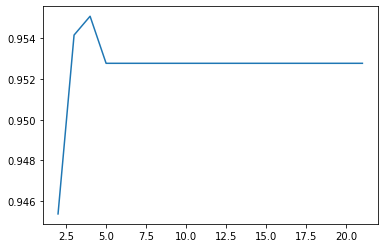

In [227]:
plt.plot(range(2,22),[matrix[i][2] for i in range(0,20)])    
#display the graph    
plt.show()   

For max_depth = 5

In [228]:
matrix = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],
          [0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],
          [0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for i in range(0,20):
    parameters = {'objective': 'binary',
                'metric': 'auc',
                'is_unbalance': 'true',
                'boosting': 'gbdt',
                'num_leaves': i+3,  #number of leaves are varied from 3 to 22 
                'feature_fraction': 0.5,
                'bagging_fraction': 0.5,
                'bagging_freq': 20,
                'learning_rate': 0.01,
                'verbose': -1,
                'max_depth': 4
                }

    model = lightgbm.train(parameters,train_data,valid_sets = valid_data,num_boost_round=5000,early_stopping_rounds=50)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    y_test_pred = model.predict(X_test)

    print('\n')
    print('\n')
    print('AUC Train: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
    print('AUC Valid: {:.4f}'.format(roc_auc_score(y_valid, y_valid_pred)))

    print('AUC Test: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))
    print('\n')
    print('\n')


    matrix[i][0] = roc_auc_score(y_train, y_train_pred)
    matrix[i][1] = roc_auc_score(y_valid, y_valid_pred)
    matrix[i][2] = roc_auc_score(y_test, y_test_pred)


print(matrix)

Streaming output truncated to the last 5000 lines.
[254]	valid_0's auc: 0.985556
[255]	valid_0's auc: 0.985556
[256]	valid_0's auc: 0.985556
[257]	valid_0's auc: 0.985556
[258]	valid_0's auc: 0.985556
[259]	valid_0's auc: 0.985556
[260]	valid_0's auc: 0.985556
[261]	valid_0's auc: 0.985556
[262]	valid_0's auc: 0.985556
[263]	valid_0's auc: 0.985556
[264]	valid_0's auc: 0.985556
[265]	valid_0's auc: 0.985556
[266]	valid_0's auc: 0.985556
[267]	valid_0's auc: 0.985556
[268]	valid_0's auc: 0.985556
[269]	valid_0's auc: 0.985556
[270]	valid_0's auc: 0.985556
[271]	valid_0's auc: 0.985556
[272]	valid_0's auc: 0.984444
[273]	valid_0's auc: 0.984444
[274]	valid_0's auc: 0.984444
[275]	valid_0's auc: 0.984444
[276]	valid_0's auc: 0.984444
[277]	valid_0's auc: 0.984444
[278]	valid_0's auc: 0.984444
[279]	valid_0's auc: 0.984444
[280]	valid_0's auc: 0.984444
[281]	valid_0's auc: 0.984444
[282]	valid_0's auc: 0.984444
[283]	valid_0's auc: 0.984444
[284]	valid_0's auc: 0.984444
[285]	valid_0's auc

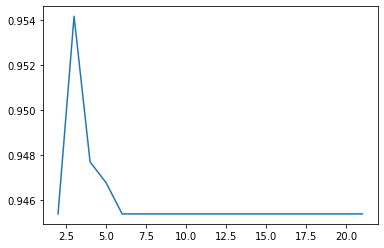

In [229]:
plt.plot(range(2,22),[matrix[i][2] for i in range(0,20)])    
#display the graph    
plt.show()   